In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# cols in question
# numerical -> Luxury_category, others, floor_category
# categorical -› property_type, sector, agepossession

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('data_download/gurgaon_properties_missing_value_imputation.csv')

In [5]:
df.shape

(3554, 18)

In [6]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global city,sector 92,0.78,7723.0,2,2,3,2.0,Under Construction,846.0,0,0,0,0,1,0,24
1,flat,bptp terra,sector 37d,1.72,7850.0,3,3,3+,10.0,Relatively New,1983.0,0,1,0,0,0,0,31
2,flat,ambience lagoon,sector 24,4.25,13281.0,3,4,3+,3.0,Old Property,3201.0,0,1,0,1,0,2,143
3,flat,pioneer park,sector 61,2.00,11765.0,3,3,3,24.0,Moderately Old,1538.0,0,0,0,0,0,2,75
4,flat,dlf the primus,sector 82a,1.80,13846.0,3,3,3+,10.0,Relatively New,1545.0,0,1,0,0,0,1,174


In [7]:
train_df = df.drop(columns=['society','price_per_sqft'])

In [8]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 92,0.78,2,2,3,2.0,Under Construction,846.0,0,0,0,0,1,0,24
1,flat,sector 37d,1.72,3,3,3+,10.0,Relatively New,1983.0,0,1,0,0,0,0,31
2,flat,sector 24,4.25,3,4,3+,3.0,Old Property,3201.0,0,1,0,1,0,2,143
3,flat,sector 61,2.00,3,3,3,24.0,Moderately Old,1538.0,0,0,0,0,0,2,75
4,flat,sector 82a,1.80,3,3,3+,10.0,Relatively New,1545.0,0,1,0,0,0,1,174


### luxury score

<Axes: >

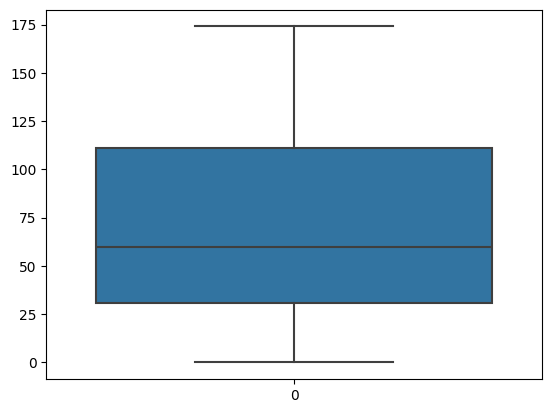

In [9]:
sns.boxplot(df['luxury_score'])

In [10]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins

In [11]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [12]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,sector 92,0.78,2,2,3,2.0,Under Construction,846.0,0,0,0,0,1,0,24,Low
1,flat,sector 37d,1.72,3,3,3+,10.0,Relatively New,1983.0,0,1,0,0,0,0,31,Low
2,flat,sector 24,4.25,3,4,3+,3.0,Old Property,3201.0,0,1,0,1,0,2,143,Medium
3,flat,sector 61,2.00,3,3,3,24.0,Moderately Old,1538.0,0,0,0,0,0,2,75,Medium
4,flat,sector 82a,1.80,3,3,3+,10.0,Relatively New,1545.0,0,1,0,0,0,1,174,High


### floorNum

<Axes: >

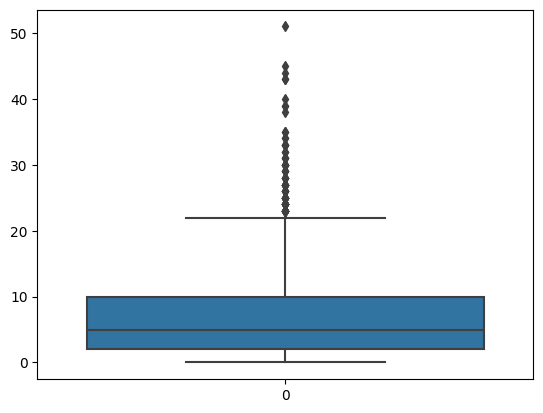

In [13]:
sns.boxplot(df['floorNum'])

In [14]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins

In [15]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [16]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,flat,sector 92,0.78,2,2,3,2.0,Under Construction,846.0,0,0,0,0,1,0,24,Low,Low Floor
1,flat,sector 37d,1.72,3,3,3+,10.0,Relatively New,1983.0,0,1,0,0,0,0,31,Low,Mid Floor
2,flat,sector 24,4.25,3,4,3+,3.0,Old Property,3201.0,0,1,0,1,0,2,143,Medium,Mid Floor
3,flat,sector 61,2.00,3,3,3,24.0,Moderately Old,1538.0,0,0,0,0,0,2,75,Medium,High Floor
4,flat,sector 82a,1.80,3,3,3+,10.0,Relatively New,1545.0,0,1,0,0,0,1,174,High,Mid Floor


In [17]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [18]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,sector 92,0.78,2,2,3,Under Construction,846.0,0,0,0,0,1,0,Low,Low Floor
1,flat,sector 37d,1.72,3,3,3+,Relatively New,1983.0,0,1,0,0,0,0,Low,Mid Floor
2,flat,sector 24,4.25,3,4,3+,Old Property,3201.0,0,1,0,1,0,2,Medium,Mid Floor
3,flat,sector 61,2.00,3,3,3,Moderately Old,1538.0,0,0,0,0,0,2,Medium,High Floor
4,flat,sector 82a,1.80,3,3,3+,Relatively New,1545.0,0,1,0,0,0,1,High,Mid Floor


In [19]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'sector 1',
       'sector 102', 'sector 103', 'sector 104', 'sector 105',
       'sector 106', 'sector 107', 'sector 108', 'sector 109',
       'sector 10a', 'sector 11', 'sector 110', 'sector 111',
       'sector 112', 'sector 113', 'sector 12', 'sector 13', 'sector 14',
       'sector 15', 'sector 17', 'sector 17a', 'sector 17b', 'sector 2',
       'sector 21', 'sector 22', 'sector 23', 'sector 24', 'sector 25',
       'sector 26', 'sector 27', 'sector 28', 'sector 3',
       'sector 3 phase 2', 'sector 3 phase 3 extension', 'sector 30',
       'sector 31', 'sector 33', 'sector 36', 'sector 36a', 'sector 37',
       'sector 37c', 'sector 37d', 'sector 38', 'sector 39', 'sector 4',
       'sector 40', 'sector 41', 'sector 43', 'sector 45', 'sector 46',
       'sector 47', 'sector 48', 'sector 49', 'sector 5', 'sector 50',
       'sector 51', 'sector 52', 'sector 53', 'sector 54', 'sector 5

In [20]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,105.0,2,2,3.0,4.0,846.0,0,0,0,0,1,0,1.0,1.0
1,0.0,44.0,3,3,4.0,3.0,1983.0,0,1,0,0,0,0,1.0,2.0
2,0.0,29.0,3,4,4.0,2.0,3201.0,0,1,0,1,0,2,2.0,2.0
3,0.0,69.0,3,3,3.0,0.0,1538.0,0,0,0,0,0,2,2.0,0.0
4,0.0,94.0,3,3,4.0,3.0,1545.0,0,1,0,0,0,1,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,4.0,3,3,3.0,3.0,2200.0,1,1,0,0,0,0,1.0,0.0
3550,0.0,111.0,2,2,2.0,3.0,619.0,0,0,0,0,0,0,1.0,2.0
3551,0.0,75.0,3,4,4.0,3.0,2490.0,0,1,0,1,0,2,2.0,0.0
3552,1.0,13.0,2,6,4.0,3.0,1215.0,0,0,0,0,0,0,1.0,2.0


In [21]:
y_label

0       0.780
1       1.720
2       4.250
3       2.000
4       1.800
        ...  
3549    2.610
3550    0.269
3551    3.650
3552    2.100
3553    0.750
Name: price, Length: 3554, dtype: float64

### Technique 1 - Correlation Analysis

<Axes: >

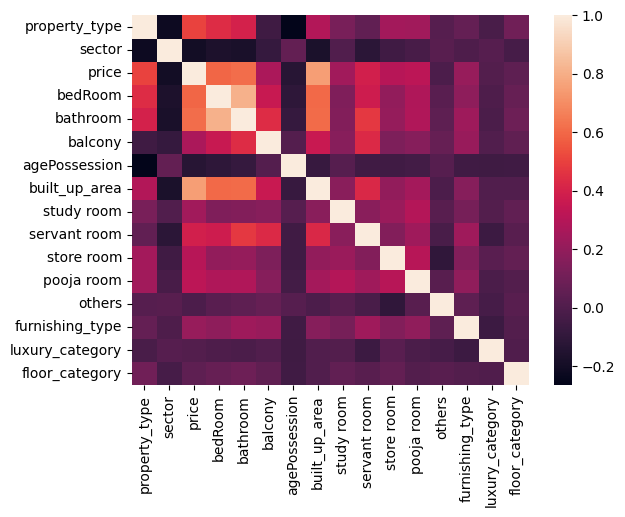

In [22]:
 sns.heatmap(data_label_encoded.corr())

In [23]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,sector,-0.201796
1,price,1.000000
2,bedRoom,0.591347
3,bathroom,0.609857
4,balcony,0.269849
5,agePossession,-0.133217
6,built_up_area,0.748562
7,study room,0.243190
8,servant room,0.392040
9,store room,0.305718


### Technique 2 - Random Forest Feature Importance

In [24]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.651531
1,sector,0.105981
0,property_type,0.101889
3,bathroom,0.026057
2,bedRoom,0.022011
8,servant room,0.020373
5,agePossession,0.013457
4,balcony,0.012739
7,study room,0.009044
13,luxury_category,0.007291


### Technique 3 - Gradient Boosting Feature importances

In [25]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
6,built_up_area,0.683223
1,sector,0.101204
0,property_type,0.096399
2,bedRoom,0.038421
3,bathroom,0.035440
8,servant room,0.021998
9,store room,0.009531
5,agePossession,0.005178
7,study room,0.003493
4,balcony,0.001734


### Technique 4 - Permutation Importance

In [26]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.709948
0,property_type,0.195956
1,sector,0.165084
2,bedRoom,0.023581
3,bathroom,0.010811
8,servant room,0.009551
4,balcony,0.008752
14,floor_category,0.002263
5,agePossession,0.001460
12,furnishing_type,0.000842


### Technique 5 - LASSO

In [27]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5


,feature,lasso_coeff
6,built_up_area,1.511276
0,property_type,0.713264
3,bathroom,0.278389
9,store room,0.198854
7,study room,0.175783
8,servant room,0.167224
12,furnishing_type,0.135713
10,pooja room,0.075038
13,luxury_category,0.048251
2,bedRoom,0.019012


### Technique 6 - RFE

In [28]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6


,feature,rfe_score
6,built_up_area,0.652418
1,sector,0.104436
0,property_type,0.099491
2,bedRoom,0.027412
3,bathroom,0.023793
8,servant room,0.020396
5,agePossession,0.014206
4,balcony,0.012163
9,store room,0.009158
12,furnishing_type,0.007446


### Technique 7 - Linear Regression Weights

In [32]:
# Train a linear regression model on the label-encoded and standardized training data
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7


,feature,reg_coeffs
6,built_up_area,1.513842
0,property_type,0.712981
3,bathroom,0.285063
9,store room,0.203150
7,study room,0.184033
8,servant room,0.176538
12,furnishing_type,0.144964
10,pooja room,0.077996
13,luxury_category,0.059466
2,bedRoom,0.021984


### Technique 8 - SHAP

In [33]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.8/455.8 kB 6.1 MB/s eta 0:00:00a 0:00:01


In [34]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values


array([[-0.18561975, -0.42594829, -0.04564409, ..., -0.00613613,
        -0.00192512, -0.00645637],
       [-0.42435489, -0.03192597, -0.03603954, ..., -0.02244553,
        -0.01181747, -0.02551852],
       [-1.09805102,  0.25679689, -0.01525931, ...,  0.02720268,
        -0.05423695, -0.00425635],
       ...,
       [-0.39500592,  0.55827642, -0.01634954, ...,  0.01745398,
        -0.01414309,  0.08528702],
       [ 0.58642347, -0.20928781, -0.03365014, ..., -0.02911974,
        -0.00909118,  0.00919186],
       [-0.26471462, -0.11492123, -0.08831253, ..., -0.00609298,
        -0.007998  ,  0.02797929]])

In [35]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
6,built_up_area,1.250785
0,property_type,0.471849
1,sector,0.385546
3,bathroom,0.117684
8,servant room,0.096865
2,bedRoom,0.049565
4,balcony,0.042097
5,agePossession,0.025358
14,floor_category,0.024478
7,study room,0.021657


In [36]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')

In [37]:
final_fi_df


,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,-0.201796,0.105981,0.101204,0.165084,-0.052903,0.104436,-0.061788,0.385546
bedRoom,0.591347,0.022011,0.038421,0.023581,0.019012,0.027412,0.021984,0.049565
bathroom,0.609857,0.026057,0.035440,0.010811,0.278389,0.023793,0.285063,0.117684
balcony,0.269849,0.012739,0.001734,0.008752,-0.044299,0.012163,-0.067351,0.042097
agePossession,-0.133217,0.013457,0.005178,0.001460,-0.000000,0.014206,0.000780,0.025358
built_up_area,0.748562,0.651531,0.683223,0.709948,1.511276,0.652418,1.513842,1.250785
study room,0.243190,0.009044,0.003493,-0.007825,0.175783,0.006760,0.184033,0.021657
servant room,0.392040,0.020373,0.021998,0.009551,0.167224,0.020396,0.176538,0.096865
store room,0.305718,0.006413,0.009531,-0.008160,0.198854,0.009158,0.203150,0.014554


In [38]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [39]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.717655
sector             0.142571
bathroom           0.032612
bedRoom            0.029446
servant room       0.025340
balcony            0.011892
agePossession      0.010055
floor_category     0.005824
furnishing_type    0.005458
store room         0.005172
luxury_category    0.004702
study room         0.004645
pooja room         0.002805
others             0.001823
dtype: float64

In [40]:
# to drop pooja room, study room, others
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,105.0,2,2,3.0,4.0,846.0,0,0,0,0,1,0,1.0,1.0
1,0.0,44.0,3,3,4.0,3.0,1983.0,0,1,0,0,0,0,1.0,2.0
2,0.0,29.0,3,4,4.0,2.0,3201.0,0,1,0,1,0,2,2.0,2.0
3,0.0,69.0,3,3,3.0,0.0,1538.0,0,0,0,0,0,2,2.0,0.0
4,0.0,94.0,3,3,4.0,3.0,1545.0,0,1,0,0,0,1,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,4.0,3,3,3.0,3.0,2200.0,1,1,0,0,0,0,1.0,0.0
3550,0.0,111.0,2,2,2.0,3.0,619.0,0,0,0,0,0,0,1.0,2.0
3551,0.0,75.0,3,4,4.0,3.0,2490.0,0,1,0,1,0,2,2.0,0.0
3552,1.0,13.0,2,6,4.0,3.0,1215.0,0,0,0,0,0,0,1.0,2.0


In [41]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [42]:
scores.mean()

0.8040603189464504

In [43]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')

In [44]:
scores.mean()

0.8046444032619371

In [45]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [46]:
export_df.to_csv('data_download/gurgaon_properties_post_feature_selection.csv', index=False)

In [47]:
export_df

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,0.0,105.0,2,2,3.0,4.0,846.0,0,0,0,1.0,1.0,0.780
1,0.0,44.0,3,3,4.0,3.0,1983.0,1,0,0,1.0,2.0,1.720
2,0.0,29.0,3,4,4.0,2.0,3201.0,1,0,2,2.0,2.0,4.250
3,0.0,69.0,3,3,3.0,0.0,1538.0,0,0,2,2.0,0.0,2.000
4,0.0,94.0,3,3,4.0,3.0,1545.0,1,0,1,0.0,2.0,1.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,4.0,3,3,3.0,3.0,2200.0,1,0,0,1.0,0.0,2.610
3550,0.0,111.0,2,2,2.0,3.0,619.0,0,0,0,1.0,2.0,0.269
3551,0.0,75.0,3,4,4.0,3.0,2490.0,1,0,2,2.0,0.0,3.650
3552,1.0,13.0,2,6,4.0,3.0,1215.0,0,0,0,1.0,2.0,2.100
